In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
citydata = "city_data.csv"
ridedata = "ride_data.csv"

In [4]:
citydata_df = pd.read_csv(citydata)
citydata_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ridedata_df = pd.read_csv(ridedata)
ridedata_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
datamerged = pd.merge(citydata_df, ridedata_df, on="city")
datamerged.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


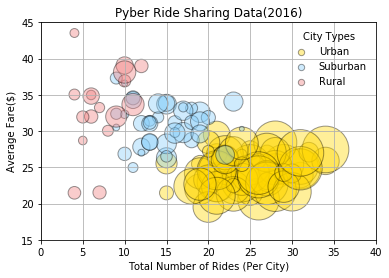

In [7]:
urban = datamerged.loc[(datamerged["type"] == "Urban")]
rural = datamerged.loc[(datamerged["type"] == "Rural")]
suburban = datamerged.loc[(datamerged["type"] == "Suburban")]
# * Total Number of Drivers Per City
urbandrivers = urban.groupby("city")["driver_count"].sum()
ruraldrivers = rural.groupby("city")["driver_count"].sum()
suburbandrivers = suburban.groupby("city")["driver_count"].sum()
# * Total Number of Rides Per City
tot_urbanrides = urban.groupby("city")["ride_id"].count()
tot_ruralrides = rural.groupby("city")["ride_id"].count()
tot_suburbanrides = suburban.groupby("city")["ride_id"].count()
# Average Fare ($) Per City
ave_urbanfare = urban.groupby("city")["fare"].mean()
ave_ruralfare = rural.groupby("city")["fare"].mean()
ave_suburbanfare = suburban.groupby("city")["fare"].mean()

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.scatter(tot_urbanrides, ave_urbanfare,s=urbandrivers,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.4, label="Urban")

plt.scatter(tot_suburbanrides, ave_suburbanfare,s=suburbandrivers,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.4, label="Suburban")

plt.scatter(tot_ruralrides, ave_ruralfare,s=ruraldrivers*5, 
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.4, label="Rural")


plt.grid()
plt.axis([0, 40, 15, 45])

lgnd = plt.legend(frameon = False, title="City Types")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]


plt.show()

In [18]:
# * % of Total Fares by City Type

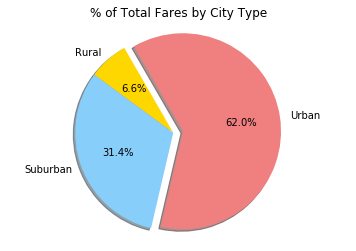

In [8]:
# Labels for the sections of our pie chart
city_typeslabels = ["Rural", "Suburban", "Urban"]
total_fare_by_type = datamerged.groupby(['type'])['fare'].sum()
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fare_by_type, explode=explode, labels=city_typeslabels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.title('% of Total Fares by City Type')

plt.axis("equal")
plt.show()

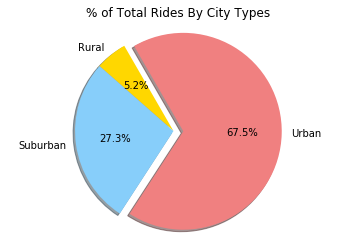

In [9]:
# Labels for the sections of our pie chart
city_typeslabels = [ "Rural","Suburban", "Urban"]
total_rides_by_type = datamerged.groupby(['type'])['ride_id'].count()
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides_by_type, explode=explode, labels=city_typeslabels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.title('% of Total Rides By City Types')

plt.axis("equal")
plt.show()

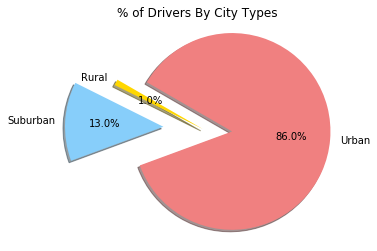

In [11]:
# Labels for the sections of our pie chart
city_typeslabels = [ "Rural","Suburban", "Urban"]
total_drivers_by_type = datamerged.groupby(['type'])['driver_count'].sum()
explode = (0, 0.4, 0.3)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers_by_type, explode=explode, labels=city_typeslabels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=150)
plt.title('% of Drivers By City Types')

plt.axis("equal")
plt.show()


<html><div style="font-size:45px; padding-bottom:15px;"><b>Pyber Analysis</b></div>
    <ol>
        <li>Suburban Drivers drive further and/or longer than Urban Drivers time this is shown by the high cost of fare.
        </li>
        <li>Urban Drivers drive shorter distances and/or in less time but drive people more frequently as seen in the cost of fair to the number of rides. Urban Drivers account for most of pybers revenues as 67% of the rides and 62% of the fares come from Urban areas
        </li>
        <li>Rural drivers drive the longest and/or the farthest this can be seen by the very high average fare but with far less rides as both other Drivers
        </li>
    </ol>
    
<html>
    